# Deep Feedforward Networks: Practical Implementation
**Authors:** Iheb Marouani & Zuzanna Bojarska  
**Seminar:** Deep Learning Concepts, University of Osnabrück (2024/2025)  
**Chapter Focus:** Deep Feedforward Networks
---

## 1. Setup: Import Libraries and Configure the Environment
We start by importing the required libraries and setting up our environment. PyTorch will be used to define and train our model, and we will use CUDA if it is available.


In [5]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from model.ffn import FeedForwardNetwork  # Import the model from the model directory
from scripts.data_preparation import prepare_data  # Import the data preparation function

# Configure the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


## 2. Data Preparation
We prepare the CIFAR-10 dataset by normalizing it and loading it into DataLoader objects for efficient batch processing during training and testing.

In [6]:
trainloader, testloader, classes = prepare_data()


Files already downloaded and verified
Files already downloaded and verified


## 3. Model Architecture
We define a simple feedforward network with three fully connected layers and ReLU activations. The model is designed based on concepts from Chapter 6.

In [9]:
# Initialize the feedforward network and move it to the configured device
model = FeedForwardNetwork().to(device)  # Model from model/ffn.py
print(model)


FeedForwardNetwork(
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## 4. Loss Function and Optimizer
We use cross-entropy loss for our classification problem and SGD (stochastic gradient descent) as the optimizer to update the model's parameters.

In [10]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Standard loss function for classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Using SGD with a learning rate of 0.01


## 5. Training the Model
We train the model over multiple epochs. Each iteration consists of a forward pass, loss calculation, backward pass, and parameter update.


In [41]:
# Initialize lists to store loss and accuracy values
running_loss_values = []  # For running loss values
average_loss_values = []  # For average loss per epoch
accuracy_values = []  # For storing accuracy per epoch

num_epochs = 100  # Number of epochs
for epoch in range(num_epochs):
    running_loss = 0.0
    total_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update parameters

        running_loss += loss.item()
        total_loss += loss.item()

        # Calculate running accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print running loss every 500 mini-batches
        if i % 500 == 499:
            avg_running_loss = running_loss / 500  # Average running loss
            print(f"[{epoch + 1}, {i + 1}] running loss: {avg_running_loss:.3f}")
            running_loss_values.append(avg_running_loss)
            running_loss = 0.0  # Reset running loss

    # Calculate and store average loss for the epoch
    avg_epoch_loss = total_loss / len(trainloader)
    average_loss_values.append(avg_epoch_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}] average loss: {avg_epoch_loss:.3f}")

    # Calculate and store accuracy for the epoch
    epoch_accuracy = (correct / total) * 100
    accuracy_values.append(epoch_accuracy)
    print(f"Epoch [{epoch + 1}/{num_epochs}] accuracy: {epoch_accuracy:.2f}%")

    # Save weights for every epoch
    torch.save(model.state_dict(), f'weights/weights_epoch_{epoch + 1}.pth')
    print(f"Weights saved for epoch {epoch + 1}")

print("Finished Training")


[1, 500] running loss: 1.161
[1, 1000] running loss: 1.159
[1, 1500] running loss: 1.166
Epoch [1/100] average loss: 1.162
Epoch [1/100] accuracy: 59.69%
Weights saved for epoch 1
[2, 500] running loss: 1.097
[2, 1000] running loss: 1.126
[2, 1500] running loss: 1.106
Epoch [2/100] average loss: 1.111
Epoch [2/100] accuracy: 61.38%
Weights saved for epoch 2
[3, 500] running loss: 1.055
[3, 1000] running loss: 1.061
[3, 1500] running loss: 1.060
Epoch [3/100] average loss: 1.060
Epoch [3/100] accuracy: 63.26%
Weights saved for epoch 3
[4, 500] running loss: 1.002
[4, 1000] running loss: 1.015
[4, 1500] running loss: 1.021
Epoch [4/100] average loss: 1.014
Epoch [4/100] accuracy: 64.93%
Weights saved for epoch 4
[5, 500] running loss: 0.943
[5, 1000] running loss: 0.961
[5, 1500] running loss: 0.990
Epoch [5/100] average loss: 0.965
Epoch [5/100] accuracy: 66.55%
Weights saved for epoch 5
[6, 500] running loss: 0.900
[6, 1000] running loss: 0.913
[6, 1500] running loss: 0.938
Epoch [6/10

KeyboardInterrupt: 

In [42]:
torch.save(model.state_dict(), "feedforward_net.pth")


## 6. Training Loss plots

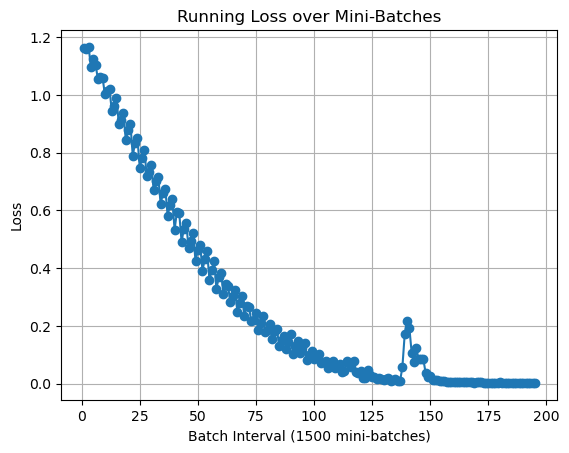

In [43]:
import matplotlib.pyplot as plt

# Define the function for plotting running loss
def plot_running_loss(running_loss_values):
    plt.figure()
    plt.plot(range(1, len(running_loss_values) + 1), running_loss_values, marker='o')
    plt.title("Running Loss over Mini-Batches")
    plt.xlabel("Batch Interval (1500 mini-batches)")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# Call the function to plot running loss over mini-batches
plot_running_loss(running_loss_values)


ValueError: x and y must have same first dimension, but have shapes (100,) and (65,)

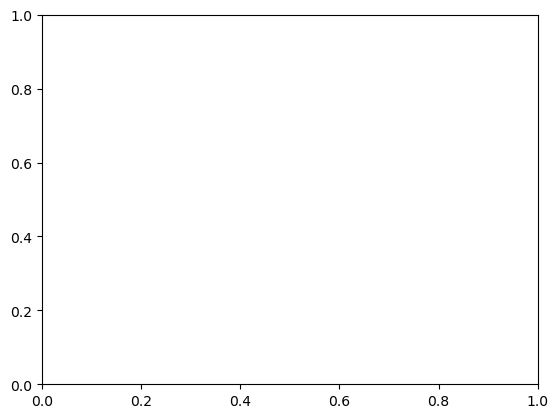

In [44]:
def plot_average_loss(average_loss_values, num_epochs):
    plt.figure()
    plt.plot(range(1, num_epochs + 1), average_loss_values, marker='o')
    plt.title("Average Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# Call the function to plot average loss over epochs
plot_average_loss(average_loss_values, num_epochs)

## 7. accuracy plot

ValueError: x and y must have same first dimension, but have shapes (100,) and (65,)

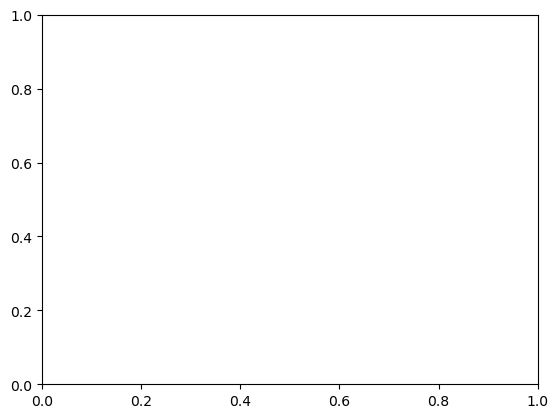

In [45]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Define the function to plot accuracy
def plot_accuracy(accuracy_values, num_epochs):
    plt.figure()
    plt.plot(range(1, num_epochs + 1), accuracy_values, marker='o', color='green')
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.grid(True)
    plt.show()

# Call the function to plot accuracy
plot_accuracy(accuracy_values, num_epochs)


## 8. Model evaluation: Ovverall accuracy on the test set 

In [47]:
# Model Evaluation: Calculate and Print Overall Accuracy on the Test Set

model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for inference
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
        total += labels.size(0)  # Total number of labels
        correct += (predicted == labels).sum().item()  # Count of correct predictions

# Calculate and print accuracy
accuracy = 100 * correct / total
print(f"Accuracy on the 10,000 test images: {accuracy:.2f}%")


Accuracy on the 10,000 test images: 56.37%


## 9. Precision and recall 

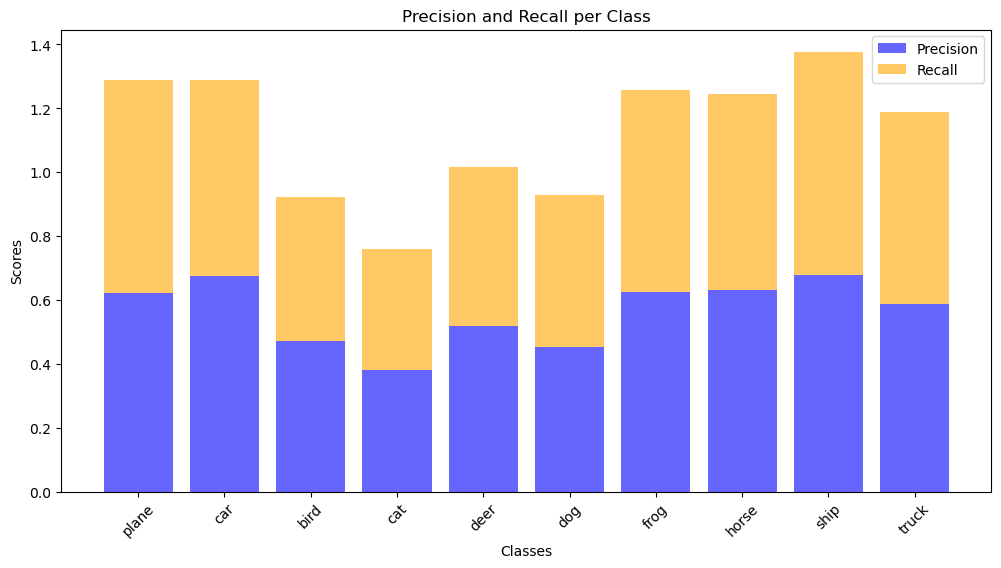

In [48]:
import torch
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

# Lists to store precision and recall values for each class
precision_values = []
recall_values = []

# Evaluate the model on the test set and gather predictions and labels
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient calculation for inference
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate precision and recall for each class
precision_values = precision_score(all_labels, all_preds, average=None)  # Precision per class
recall_values = recall_score(all_labels, all_preds, average=None)  # Recall per class

# Visualize precision and recall
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 6))
plt.bar(classes, precision_values, alpha=0.6, label='Precision', color='blue')
plt.bar(classes, recall_values, alpha=0.6, label='Recall', color='orange', bottom=precision_values)
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision and Recall per Class')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## 10. weight distributions plot


FileNotFoundError: [Errno 2] No such file or directory: 'weights/weights_epoch_66.pth'

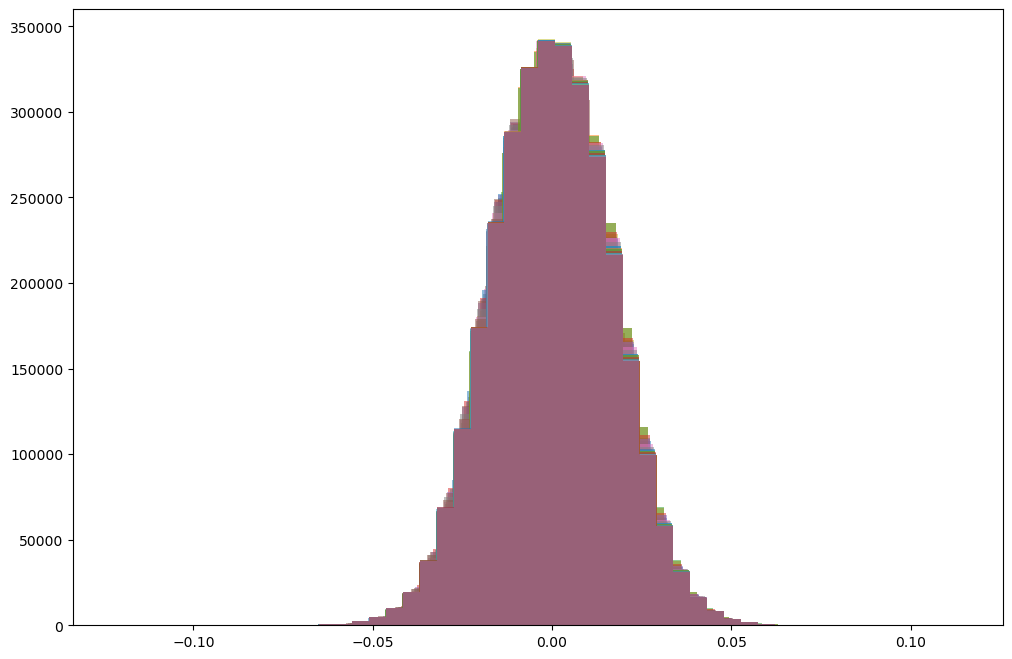

In [50]:
import torch
import matplotlib.pyplot as plt

def plot_weight_distributions_across_epochs(total_epochs, layer_name='fc1.weight'):
    """
    Plots the distribution of weights from all epochs.

    Parameters:
    - total_epochs: The total number of epochs.
    - layer_name: The name of the layer whose weights you want to visualize.
    """
    plt.figure(figsize=(12, 8))
    
    for epoch in range(1, total_epochs + 1):
        file_path = f'weights/weights_epoch_{epoch}.pth'
        weights = torch.load(file_path)
        layer_weights = weights[layer_name].flatten().numpy()
        plt.hist(layer_weights, bins=50, alpha=0.5, label=f'Epoch {epoch}')
    
    plt.title("Weight Distribution Across Epochs")
    plt.xlabel("Weight Values")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot weight distributions across all epochs
plot_weight_distributions_across_epochs(num_epochs, layer_name='fc1.weight')


## 10. Confusion matrix

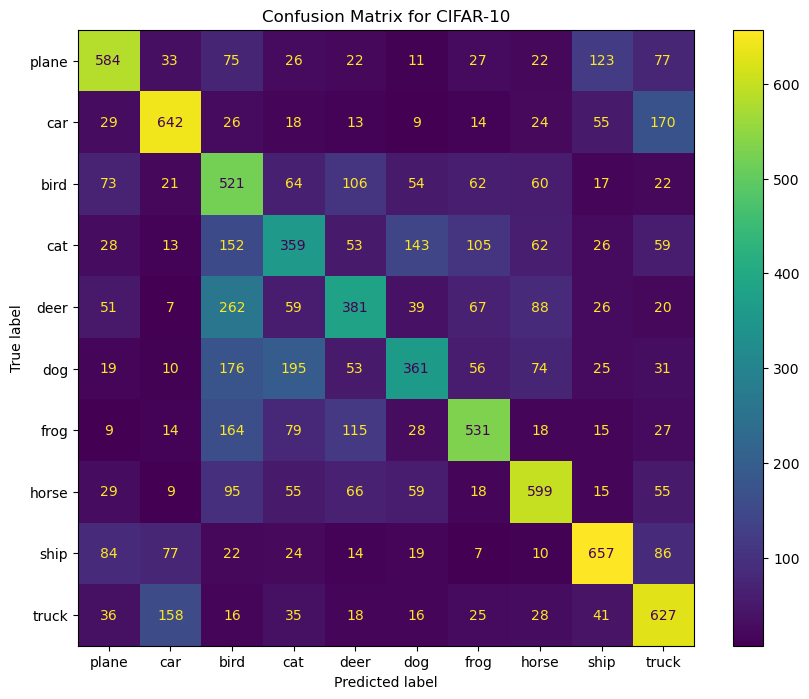

In [30]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the confusion matrix plotting function
def plot_confusion_matrix(model, testloader, classes, device):
    # Set the model to evaluation mode
    model.eval()
    
    all_preds = []
    all_labels = []

    # Disable gradient calculation for inference
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Compute the confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Display the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(ax=ax, cmap='viridis')
    plt.title("Confusion Matrix for CIFAR-10")
    plt.show()

# Define the class labels for CIFAR-10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Call the function to plot the confusion matrix
plot_confusion_matrix(model, testloader, classes, device)

